# Adagrad, RMSProp and AdaDelta

## Adagrad 
The fundamental idea behind Adagrad is to change learning rate over time and across layers - adaptive gradient. This is useful - for example, if we had sparse (mostly zeros) and dense (mostly non-zeros features, then we would ideally want to have different learning rates for the different features. So, can we use different learning rates with respect to iterations and layers? 

Our weight update formula is mostly the same, however learning rate $\alpha$ is changed to $\alpha'_t$: 

$w_t = w_{t-1} - \alpha'_t \times \frac{dL}{dw_{t-1}}$

So we want $\alpha'_t$ to change over time, we have a new way to compute the learning rate, given a starting learning rate $\alpha$: 

$\alpha'_t = \frac{\alpha}{\sqrt{G_t + \epsilon}}$

We have introduced two new terms. $\epsilon$ prevents $\alpha'_t$ from becoming zero - if $G_t = 0$, then our value for the whole term would be zero and, putting this in our original weight update equation, we would produce a zero for the whole term and thus our new weight would be equal to our old weight. Thus, we add the small positive constant $\epsilon$ to prevent the term becoming zero. $G_t$ requires a different computation:

$G_t = \Sigma_{i=1}^t (\frac{dL}{dw_i})^2$

This is saying that $G_t$ will be the squared sum of derivative of losses from previous iterations. As we are squaring this, this becomes a larger and larger number as iterations increase and, as this is part of the denominator, it means that as $G_t$ increases then $\alpha'_t$ is decreasing. So, as iterations increase, learning rate decreases, and thus weights update slowly. 

We have a changing learning rate as iterations go on. This is useful because as we increase iterations, we should be approaching the minima, and by decreasing the learning rate we decrease the steps so that we can reach the minima where we converge. There is one disadvantage of using adaptive gradient is that, as iterations increase, we end up with a very high value of $G_t$. This is improved upon by the extensions of Adagrad, RMSProp and AdaDelta. 

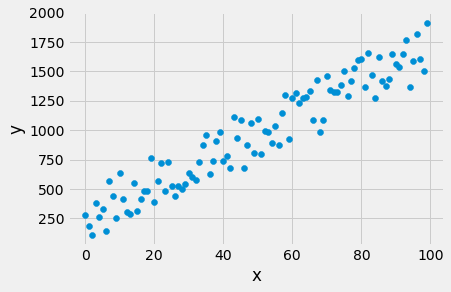

In [1]:
import numpy as np 
from numpy.random import permutation
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("fivethirtyeight")
import seaborn as sns 
from sklearn import datasets 
from sklearn.model_selection import train_test_split

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Simulate data
true_slope = 14.321
true_intercept = 7.2 
input_var = np.arange(0.0, 100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var)) 

x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
def compute_cost(input_var, output_var, params):
    ''' Computes the cost of the linear regression. '''
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        # Make a prediction
        y_hat = np.dot(params, np.array([1.0, x])) # dot product between theta and x bar
        cost_sum += (y - y_hat) ** 2 # Square difference to get cost

    cost = cost_sum / (num_samples * 2.0) 
    
    return cost

In [46]:
# This isn't working yet, got to troubleshoot. Learning rates are going down too quick, something wrong with the computation. 

def adagrad(input_var, output_var, params, alpha=0.01, epsilon=1e-9, num_iters=10):
    num_samples = len(input_var)
    cost = np.zeros(num_iters)                                     # This will store cost for each iteration
    params_store = np.zeros([2, num_iters])                        # This will store parameters for each iteration
    gradients_store = np.zeros([2, num_iters])
    learning_rates = np.zeros(num_iters, dtype=float)                        # This will store the learning rate across iterations
    iteration = 0
    alpha_ = alpha
    # print(alpha_)
    # print(learning_rates)

    for i in range(num_iters-1):
        # print(i)
        # print(learning_rates[i])
        print(gradients_store)
        gamma = np.sum(np.square(gradients_store))
        alpha_ = alpha_ / np.sqrt(gamma + epsilon) # Compute new alpha
        print(alpha_)
        learning_rates[i] = alpha_
        for x, y in zip(input_var, output_var):                 # Loop over data
            cost[iteration] = compute_cost(input_var, output_var, params)
            y_hat = np.dot(params, np.array([1.0, x]))          # Compute y hat
            current_gradient = alpha_ * (np.array([1.0, x]) * (y - y_hat))         # Compute gradient
            params +=  current_gradient / num_samples            # Update parameters based on gradient
            params_store[:, iteration] = params


        print('=======================')
        print(f'Iteration {iteration}\nCost {cost[iteration]}')
        print('=======================')
        
        gradients_store[:, iteration] = current_gradient
        iteration += 1

    return params, cost, params_store, learning_rates, gradients_store

In [47]:
alpha = 1e-3 
params_theta = np.array([20.0, 80.0])
params_hat, cost, params_store, learning_rates, gradients_store = adagrad(x_train, y_train, params_theta, alpha)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
31.622776601683793
Iteration 0
Cost inf
[[5.38834767e+223 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [2.15533907e+224 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]
0.0
Iteration 1
Cost inf
[[ 5.38834767e+223 -0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 2.15533907e+224 -0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]]
0.0
Iteration 2
Cost inf
[[ 5.38834767e+223 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000

In [41]:
learning_rates

array([3.16227766e-001, 4.73114564e-064, 7.07835979e-127, 1.05900729e-189,
       1.58440158e-252, 2.37045429e-315, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

## AdaDelta and RMSProp
The internal workings of both AdaDelta and RMSProp are very similar, only they were developed by different teams. 

As mentioned before, Adagrad has the issue that $G_t$ increases to a very high number as we increase iterations, and these optimizers attempt to fix this. Furthermore, as it becomes a higher number, the learning rate becomes a smaller number which means that weight update may be **too** slow. 

The methods make a simple change to the calculation of the learning rate, replacing $G_t$ instead with $W_{avg}$, a weighted average. 

$\alpha'_t = \frac{\alpha}{\sqrt{W_{Avg}+\epsilon}}$

The weighted average at time $t$ can be computed as: 

$W_{avg_t} = \gamma \times W_{avg_{t-1}} + (1 - \gamma) \times (\frac{dL}{dw_t})^2 $

So, where we previously had $G_t$ be a sum that keeps increasing, we have the same term but we are also restricting it. A common value for $\gamma$ is 0.95. Thus, $1-\gamma = 0.05$, and so we are multiplying 0.05 by the squared derivative of loss, shrinking it. $W_{avg}$ will still increase with iterations, and the learning rate thus decreases slowly, but by restricting the gradient, convergence will not take too long. 